<a href="https://colab.research.google.com/github/Joniald/Colaboratory/blob/main/LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LinearRegression

In [ ]:
import numpy as np

np.random.seed(42)

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

Text(0, 0.5, 'y')

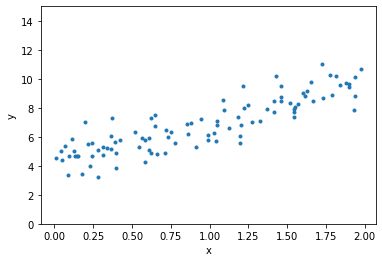

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker='.')
plt.ylim(0, 15)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
from sklearn.linear_model import LinearRegression
mod_LinReg = LinearRegression()
mod_LinReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = mod_LinReg.predict(x)
mod_LinReg.intercept_, mod_LinReg.coef_

(array([4.21509616]), array([[2.77011339]]))

(0.0, 15.0)

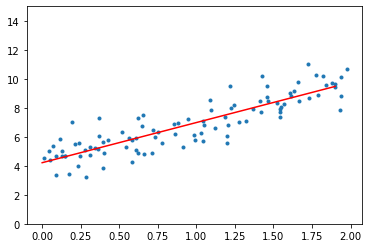

In [ ]:
xx = np.arange(0,2,0.1)
plt.plot(xx, mod_LinReg.intercept_[0] + mod_LinReg.coef_[0]*xx, c = 'r')
plt.scatter(x, y, marker='.')
plt.ylim(0, 15)

## SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_transf = stand.fit_transform(x)
mod_sgd = SGDRegressor(max_iter=5000, tol=0.001, eta0=0.01, random_state=42)
mod_sgd.fit(x_transf, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
mod_sgd.coef_, mod_sgd.intercept_

(array([1.62882595]), array([6.78214677]))

(0.0, 15.0)

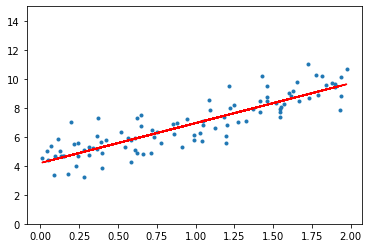

In [ ]:
#xx = np.arange(0,2,0.1)
plt.plot(x, mod_sgd.intercept_[0] + mod_sgd.coef_[0]*stand.fit_transform(x), c = 'r')
plt.scatter(x, y, marker='.')
plt.ylim(0, 15)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plotError(model, x, y):
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
  x_train_stand = StandardScaler().fit_transform(x_train)
  x_val_stand = StandardScaler().fit_transform(x_val)
  
  train_error, val_error = [], []
  for m in range(1, len(x_train_stand)):
    model.fit(x_train_stand[:m], np.squeeze(y_train[:m],axis=-1))
    model_predict = model.predict(x_train_stand[:m])
    model_val = model.predict(x_val_stand)
    train_error.append(mean_squared_error(y_train[:m], model_predict))
    val_error.append(mean_squared_error(y_val,model_val))
  plt.plot(np.sqrt(train_error), label="train")  
  plt.plot(np.sqrt(val_error), label='validation')
  plt.legend()
  plt.xlabel('Training set size') 
  plt.ylabel('RMSE')

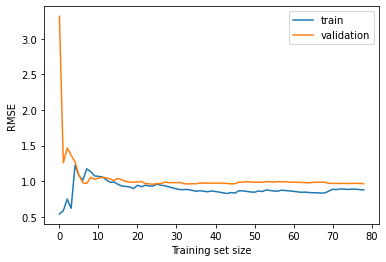

In [ ]:
plotError(mod_sgd, x, y)

## Polynomial Regression

In [ ]:
m = 1000
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(1000, 1)

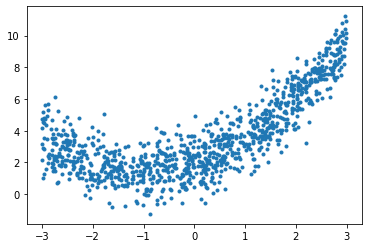

In [ ]:
plt.scatter(X, Y, marker='.')
X.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = pf.fit_transform(X)
X_polynomial[0], x[0]

(array([2.69487439, 7.26234798]), array([0.74908024]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_polynomial, Y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.02174428, 0.50989745]]), array([1.98009639]))

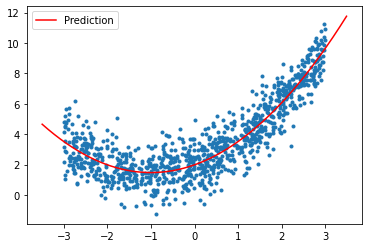

In [ ]:
XX = np.arange(-3.5,3.5,0.01)

plt.scatter(X, Y, marker='.')
plt.plot(XX, lin_reg.intercept_[0] + lin_reg.coef_[0,0]*XX + lin_reg.coef_[0,1]*(XX*XX), c='r', label="Prediction")
plt.legend()

In [ ]:
sgd_reg = SGDRegressor( max_iter=1500, tol=0.001, eta0=0.005, random_state=42)
X_stand = stand.fit_transform(X)
X_stand_poly = pf.fit_transform(X_stand)
print(X_stand_poly.shape, Y.shape)
sgd_reg.fit(X_stand_poly, np.squeeze(Y, axis=-1))
sgd_reg.intercept_, sgd_reg.coef_

(1000, 2) (1000, 1)


(array([2.01606511]), array([1.90172723, 1.53666346]))

(700, 1) (700, 2) (700,)
(1,) 1.9017272329973909


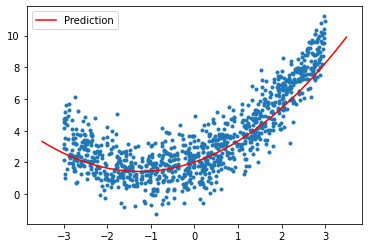

In [ ]:
XX_poly = stand.fit_transform(XX.reshape(700,1))
XX_stand_poly = pf.fit_transform(XX_poly)
print(XX_poly.shape, XX_stand_poly.shape, XX.shape)
print(sgd_reg.intercept_.shape, sgd_reg.coef_[0])

plt.scatter(X, Y, marker='.')
plt.plot(XX, sgd_reg.intercept_[0] + sgd_reg.coef_[0]*XX_stand_poly[:,0] + sgd_reg.coef_[1]*XX_stand_poly[:,1], color='r', label="Prediction")
plt.legend()

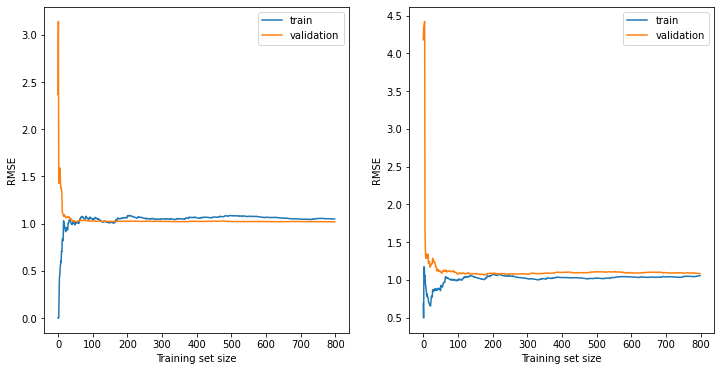

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plotError(lin_reg, pf.fit_transform(X), Y)

plt.subplot(1,2,2)
plotError(sgd_reg, pf.fit_transform(X), Y)

# Both models are underfiting